In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

CheXpert Race v1 Validation

In [ ]:
df = pd.read_csv('/content/chexpert_race_v1_split.csv')
df['Path'] = df['Path'].str.replace('-small','')
test_df = df[df.split=='test']
chexpert_race1_model = load_learner('/content/sample_data/chexpert_race1.pkl')

In [ ]:
chexpert_race1_model.dls.to(device='cuda')
chexpert_race1_model.model.to(device='cuda')
race_test_dl = chexpert_race1_model.dls.test_dl(test_df)
race_preds = chexpert_race1_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
predict_df = pd.DataFrame(test_df[['Path']])
predict_df['Race/Ethnicity'] = test_df[['Race/Ethnicity']]
predict_df['Race/Ethnicity_Tensor_Id'] =race_preds[2].numpy()
predict_df['Race/Ethnicity_Probability'] =race_preds[0].numpy().tolist()

In [ ]:
chexpert_race1_model.dls.vocab

['Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

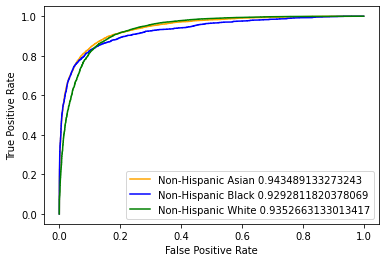

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[0] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Asian')
plt.plot(fpr,tpr, color='orange', label='Non-Hispanic Asian ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[1] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Black')
plt.plot(fpr,tpr, color='blue', label='Non-Hispanic Black ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[2] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic White')
plt.plot(fpr,tpr, color='green', label='Non-Hispanic White ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race1_chexpert_test.csv')

         index  ...                                            Race/Ethnicity_Probability
3            4  ...         [0.738633394241333, 0.08136051148176193, 0.18000607192516327]
28          32  ...       [0.03775380179286003, 0.033696550875902176, 0.9285497069358826]
29          33  ...       [0.06646572798490524, 0.006045640911906958, 0.9274886250495911]
47          55  ...    [0.0003834134549833834, 0.00016168708680197597, 0.999454915523529]
48          56  ...  [0.00019027816597372293, 2.4501092411810532e-05, 0.9997852444648743]
...        ...  ...                                                                   ...
129518  138043  ...       [0.015531850978732109, 0.03397509455680847, 0.9504930973052979]
129521  138046  ...         [0.07508386671543121, 0.2772102653980255, 0.6477058529853821]
129522  138047  ...    [0.0027394432108849287, 0.0028789290226995945, 0.9943816065788269]
129525  138050  ...         [0.18703638017177582, 0.0671018734574318, 0.7458617687225342]
129538  13

MIMIC Race Validation

In [ ]:
df = pd.read_csv('/content/chexpert_race_v1_split.csv')
df['Path'] = df['Path'].str.replace('-small','')
df['Path'] = 'content/s3/CheXpert/' + df['Path'].astype(str)
test_df = df[df.split=='test']
mimic_race_model = load_learner('/content/mimic_race.pkl')

In [ ]:
mimic_race_model.dls.to(device='cuda')
mimic_race_model.model.to(device='cuda')
race_test_dl = mimic_race_model.dls.test_dl(test_df)
race_preds = mimic_race_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
predict_df = pd.DataFrame(test_df[['Path']])
predict_df['Race/Ethnicity'] = test_df[['Race/Ethnicity']]
predict_df['Race/Ethnicity_Tensor_Id'] =race_preds[2].numpy()
predict_df['Race/Ethnicity_Probability'] =race_preds[0].numpy().tolist()
mimic_race_model.dls.vocab

['Asian', 'Black', 'Hispanic/Latino', 'Other', 'White']

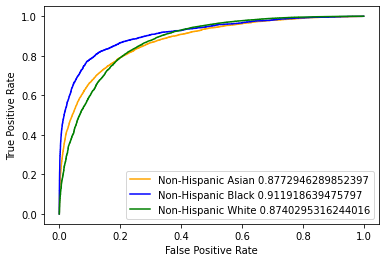

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[0] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Asian')
plt.plot(fpr,tpr, color='orange', label='Non-Hispanic Asian ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[1] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Black')
plt.plot(fpr,tpr, color='blue', label='Non-Hispanic Black ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[4] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic White')
plt.plot(fpr,tpr, color='green', label='Non-Hispanic White ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_race_chexpert_race_v1_test.csv')

         index  \
3            4   
28          32   
29          33   
47          55   
48          56   
...        ...   
129518  138043   
129521  138046   
129522  138047   
129525  138050   
129538  138063   

                                                                                 Path  \
3       content/s3/CheXpert/CheXpert-v1.0/train/patient00004/study1/view1_frontal.jpg   
28      content/s3/CheXpert/CheXpert-v1.0/train/patient00017/study1/view1_frontal.jpg   
29      content/s3/CheXpert/CheXpert-v1.0/train/patient00017/study2/view1_frontal.jpg   
47      content/s3/CheXpert/CheXpert-v1.0/train/patient00025/study2/view1_frontal.jpg   
48      content/s3/CheXpert/CheXpert-v1.0/train/patient00025/study1/view1_frontal.jpg   
...                                                                               ...   
129518  content/s3/CheXpert/CheXpert-v1.0/valid/patient64730/study1/view1_frontal.jpg   
129521  content/s3/CheXpert/CheXpert-v1.0/valid/patient64733/study1/vie